In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('인천교통공사_역별일별 이용인원현황_20230630.csv', encoding='cp949')

In [3]:
data2=data[data['구분']=='하차']

In [4]:
data2.drop(['호선','구분'], axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_9540\4204138631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(['호선','구분'], axis=1,inplace=True)


In [7]:
data_rPdid=data2[data2['역명']=='계양']

In [8]:
data_rPdid.drop('역명',axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_9540\1886525393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rPdid.drop('역명',axis=1,inplace=True)


In [9]:
df=data_rPdid

C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\tj-bu\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from curren

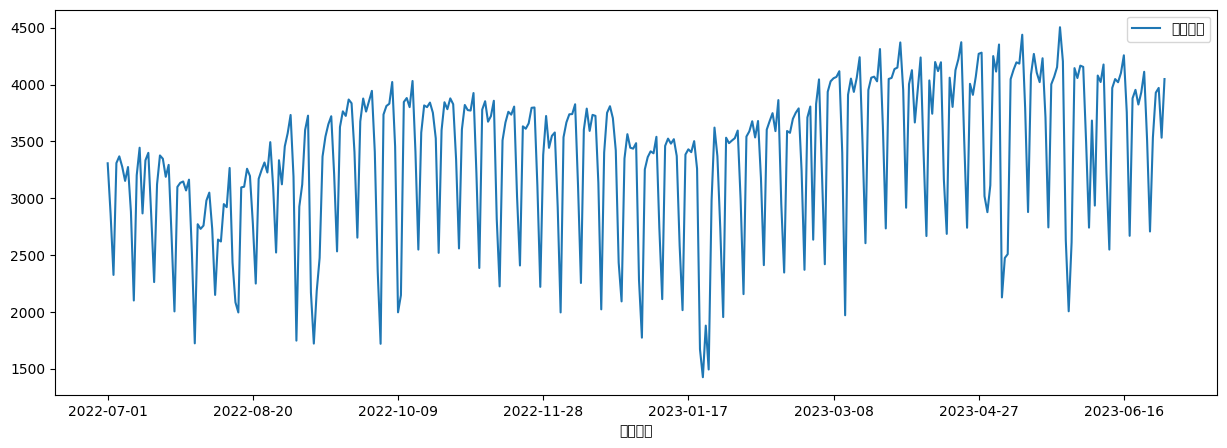

In [10]:
plt = data_rPdid.plot(x="통행일자", y="이용인원", figsize=(15, 5))

In [11]:
#ds
df['ds']=pd.to_datetime(df['통행일자'])
df['y']=df['이용인원']
df.drop(['통행일자','이용인원'],axis=1,inplace=True)

C:\Users\tj-bu\AppData\Local\Temp\ipykernel_9540\985552592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=pd.to_datetime(df['통행일자'])
C:\Users\tj-bu\AppData\Local\Temp\ipykernel_9540\985552592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['이용인원']
C:\Users\tj-bu\AppData\Local\Temp\ipykernel_9540\985552592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [12]:
df

,ds,y
1,2022-07-01,3307
3,2022-07-02,2862
5,2022-07-03,2325
7,2022-07-04,3309
9,2022-07-05,3368
...,...,...
721,2023-06-26,3534
723,2023-06-27,3928
725,2023-06-28,3970
727,2023-06-29,3532


In [13]:
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level


# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")



# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet()

# 데이터셋에 모델 피팅하기 (이 과정은 시간이 걸릴 수 있습니다)
metrics = m.fit(df)

Missing logger folder: D:\sbshim\Study_Project\project\Play_City_Noliter\03_심성보\API활용\lightning_logs


Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

FailedPreconditionError: D:\sbshim\Study_Project\project\Play_City_Noliter\03_심성보\API활용\lightning_logs is not a directory